## 양자 비트 구현

In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [3]:
circuit = QuantumCircuit(qr, cr)

다음 코드는 2 qubits와 2개의 classical bits로 circuit을 구현하는 코드입니다.

In [4]:
circuit = QuantumCircuit(2, 2)

In [5]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

`circuit`에 Hadamard 게이트를 추가합니다.

Hadamard gate는 다음과 같은 matrix로 표현됩니다.
$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [6]:
circuit.h(0)

보다 예쁘게 draw 하려면 `output='mpl'` 옵션을 추가합니다.

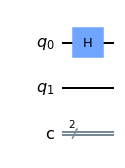

In [8]:
circuit.draw(output='mpl')

`circuit`에 CNOT 게이트를 추가합니다. usage: `cx(control bit, target bit)`

In [9]:
circuit.cx(0, 1)

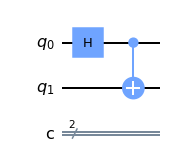

In [10]:
circuit.draw(output='mpl')

In [11]:
circuit.measure([0, 1], [0, 1])

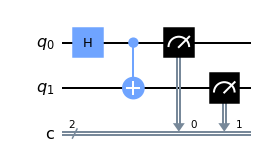

In [12]:
circuit.draw(output='mpl')

## 시뮬레이션

qiskit 시뮬레이션 tool로 Aer을 사용합니다.

In [13]:
simulator = Aer.get_backend('qasm_simulator')

usage: `execute(양자 회로, 시뮬레이터)`

In [14]:
result = execute(circuit, backend=simulator).result()

결과를 시각화하기 위하여 qiskit에서 지원하는 히스토그램을 불러옵니다.

In [15]:
from qiskit.visualization import plot_histogram

`get_counts`는 유한번 연산하기 때문에, 이론적으로는 50 : 50으로 나와야 하지만, 약간의 오차가 있을 수 있습니다.

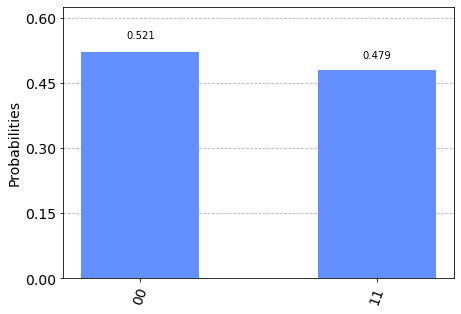

In [16]:
plot_histogram(result.get_counts(circuit))

## 양자컴퓨터에서 실행

In [17]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

엑세스 토큰을 로딩합니다.

In [18]:
provider = IBMQ.get_provider(hub='ibm-q')

양자 컴퓨터의 backend를 받아옵니다. 여기선 manila의 양자 컴퓨터를 사용합니다.

사용 가능한 hub 목록은 [IBM Quantum Services](https://quantum-computing.ibm.com/services?services=systems) 에서 확인하실 수 있습니다.

In [44]:
qcomp = provider.get_backend('ibmq_manila')

In [45]:
job = execute(circuit, backend=qcomp)

In [46]:
from qiskit.tools.monitor import job_monitor

`job is queued` 뒤의 숫자는 대기번호입니다. (처리되는 데 까지 매우 오랜 시간이 걸립니다.)

ibmq 홈페이지에서 확인할 수 있습니다.

In [47]:
job_monitor(job)

Job Status: job has successfully run


결과는 다음과 같습니다.

![first quantum circuit executed on quantum computer at manila](./first-qcom.png)


결과에서 $\ket{01}$ 과 $\ket{10}$ 에도 값이 있는 것은 **양자 오류**로 인한 것입니다.

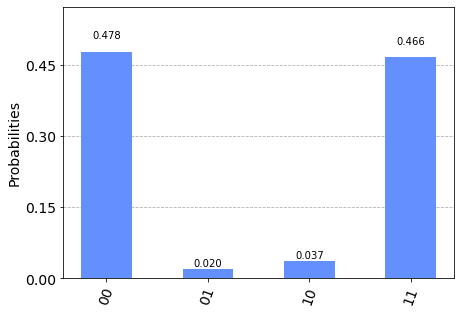

In [48]:
result = job.result()
plot_histogram(result.get_counts(circuit))